In [3]:
import json
import math
import torch
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
# File names
acc_softmax_mnist = '../results/active_learning/2024_05_14_23_16_51/test_accs_resnet18_sn_3.0_mod_seed_1_gmm_mnist.json'
acc_gmm_mnist = '/home/sq/YYM/dum/results/active_learning/2024_10_04_00_23_43/test_accs_resnet18_sn_3.0_mod_seed_1_gmm_mnist.json'
acc_gmm_mnist_ip = '/home/sq/YYM/dum/results/active_learning/2024_10_04_01_17_45/test_accs_resnet18_sn_3.0_mod_seed_1_gmm_input_perturbation_mnist.json'
acc_ensemble_mnist = '/home/sq/YYM/dum/results/active_learning/2024_10_05_20_01_34/test_accs_resnet18_sn_3.0_mod_seed_1_ensemble_input_perturbation_mnist.json'


In [10]:
# Load files
file_names = {
    acc_ensemble_mnist: None,
    acc_softmax_mnist: None,
    acc_gmm_mnist: None,
    acc_gmm_mnist_ip: None
}

for file_name in file_names.keys():
    with open(file_name, "r") as fp:
        jsn = json.load(fp)
    file_names[file_name] = jsn

In [11]:
# Compute mean and standard error
def mean_var (res_dict):
    vecs = []
    for run in res_dict.keys():
        vecs.append(torch.Tensor(res_dict[run]))
    vecs = torch.stack(vecs, dim=0)
    n = vecs.shape[0]
    mean_vecs = torch.mean(vecs, dim=0)
    std_vecs = torch.std(vecs, dim=0) / math.sqrt(n)
    return mean_vecs, std_vecs

mean_dict = {}
std_dict = {}

for file_name in file_names.keys():
    jsn = file_names[file_name]
    mean_vec, std_vec = mean_var(jsn)
    mean_dict[file_name] = mean_vec
    std_dict[file_name] = std_vec

In [12]:
clrs = ['#1f77b4','#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf']

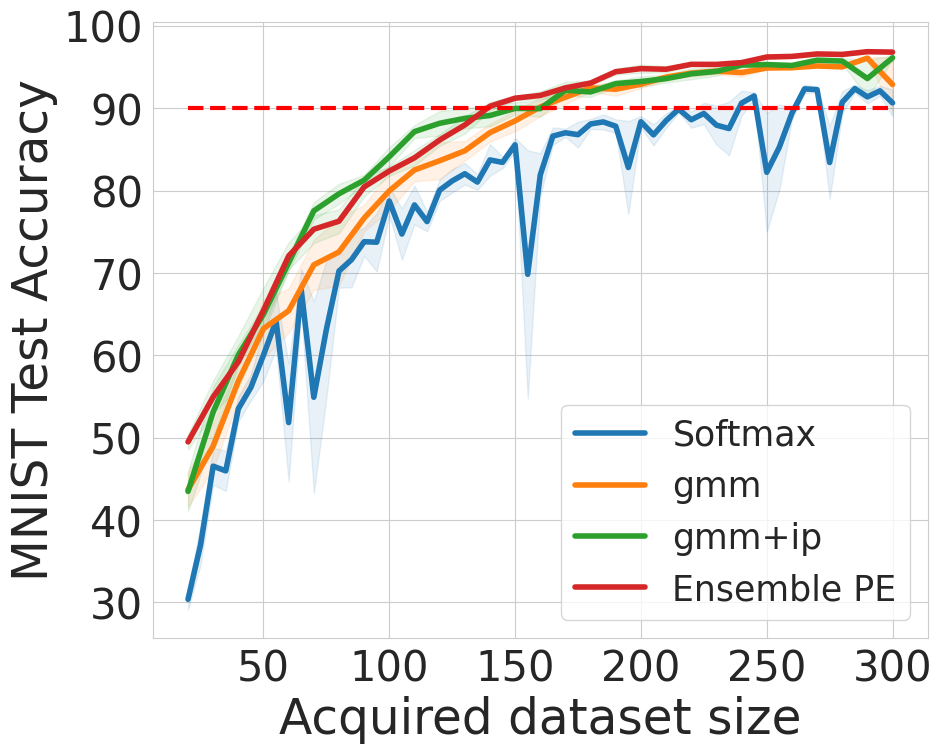

In [13]:
# Plot for MNIST
sb.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (10, 8)

nums = mean_dict[acc_softmax_mnist].shape[0]
plt.plot([i for i in range(20, 305, 5)], mean_dict[acc_softmax_mnist], linewidth=4, linestyle='-', color=clrs[0], label="Softmax")
plt.fill_between([i for i in range(20, 305, 5)],
                 (mean_dict[acc_softmax_mnist]-std_dict[acc_softmax_mnist]).numpy().tolist(),
                 (mean_dict[acc_softmax_mnist]+std_dict[acc_softmax_mnist]).numpy().tolist(),
                 color=clrs[0], alpha=0.1)
plt.plot([i for i in range(20, 305, 10)], mean_dict[acc_gmm_mnist], linewidth=4, linestyle='-', color=clrs[1], label="gmm")
plt.fill_between([i for i in range(20, 305, 10)],
                 (mean_dict[acc_gmm_mnist]-std_dict[acc_gmm_mnist]).numpy().tolist(),
                 (mean_dict[acc_gmm_mnist]+std_dict[acc_gmm_mnist]).numpy().tolist(),
                 color=clrs[1], alpha=0.1)
plt.plot([i for i in range(20, 305, 10)], mean_dict[acc_gmm_mnist_ip], linewidth=4, linestyle='-', color=clrs[2], label="gmm+ip")
plt.fill_between([i for i in range(20, 305, 10)],
                 (mean_dict[acc_gmm_mnist_ip]-std_dict[acc_gmm_mnist_ip]).numpy().tolist(),
                 (mean_dict[acc_gmm_mnist_ip]+std_dict[acc_gmm_mnist_ip]).numpy().tolist(),
                 color=clrs[2], alpha=0.1,)

plt.plot([i for i in range(20, 305, 10)], mean_dict[acc_ensemble_mnist], linewidth=4, linestyle='-', color=clrs[3], label="Ensemble PE")
plt.fill_between([i for i in range(20, 305, 10)],
                 (mean_dict[acc_ensemble_mnist]-std_dict[acc_ensemble_mnist]).numpy().tolist(),
                 (mean_dict[acc_ensemble_mnist]+std_dict[acc_ensemble_mnist]).numpy().tolist(),
                 color=clrs[2], alpha=0.1,)


plt.hlines(90, 20, 300, linestyles="dashed", linewidth=3, color="r")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Acquired dataset size', fontsize=35)
plt.ylabel('MNIST Test Accuracy', fontsize=35)
plt.legend(fontsize=25)
plt.savefig('./pngs/active_learning/test_accuracy_active_learning_mnist.png', bbox_inches='tight')
